# Weather Analysis Salzburg Airport

In [ ]:
# Installing Dependencies
import sys
import subprocess

# Print the environment where dependencies are being installed
print(f"Python executable: {sys.executable}")

# Install dependencies and capture output in a log file
install_log_path = "install_log.txt"
with open(install_log_path, "w") as log_file:
    process = subprocess.run(
        [sys.executable, "-m", "pip", "install", "pandas", "matplotlib", "numpy"],
        stdout=log_file,
        stderr=subprocess.STDOUT,
        text=True
    )

# Print the installation log
with open(install_log_path, "r") as log_file:
    print(log_file.read())

## Temperature Analysis (2010–2024)

This notebook processes temperature data from `./input.csv`, calculates monthly statistics, and plots two grouped column charts:
- **First plot**: Data from 2010–2016
- **Second plot**: Data from 2017–2024

Each plot groups data by month, displaying individual bars for each year with error bars representing min/max temperature variations.

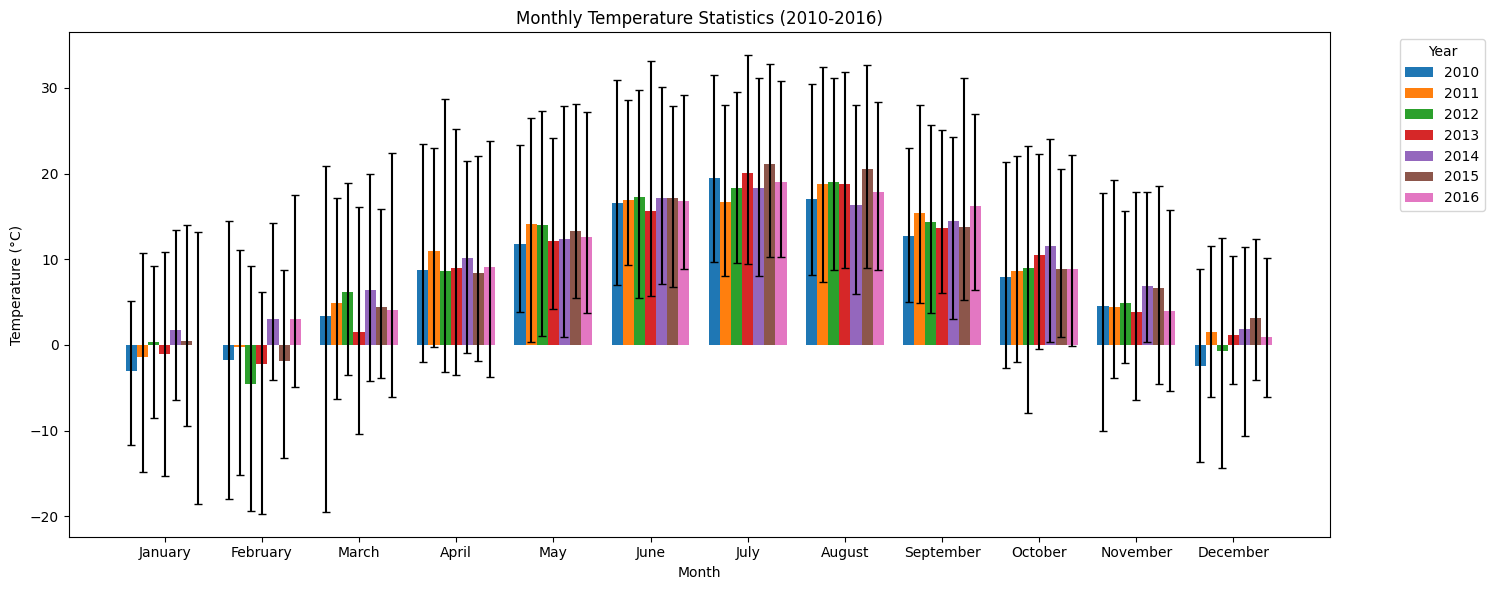

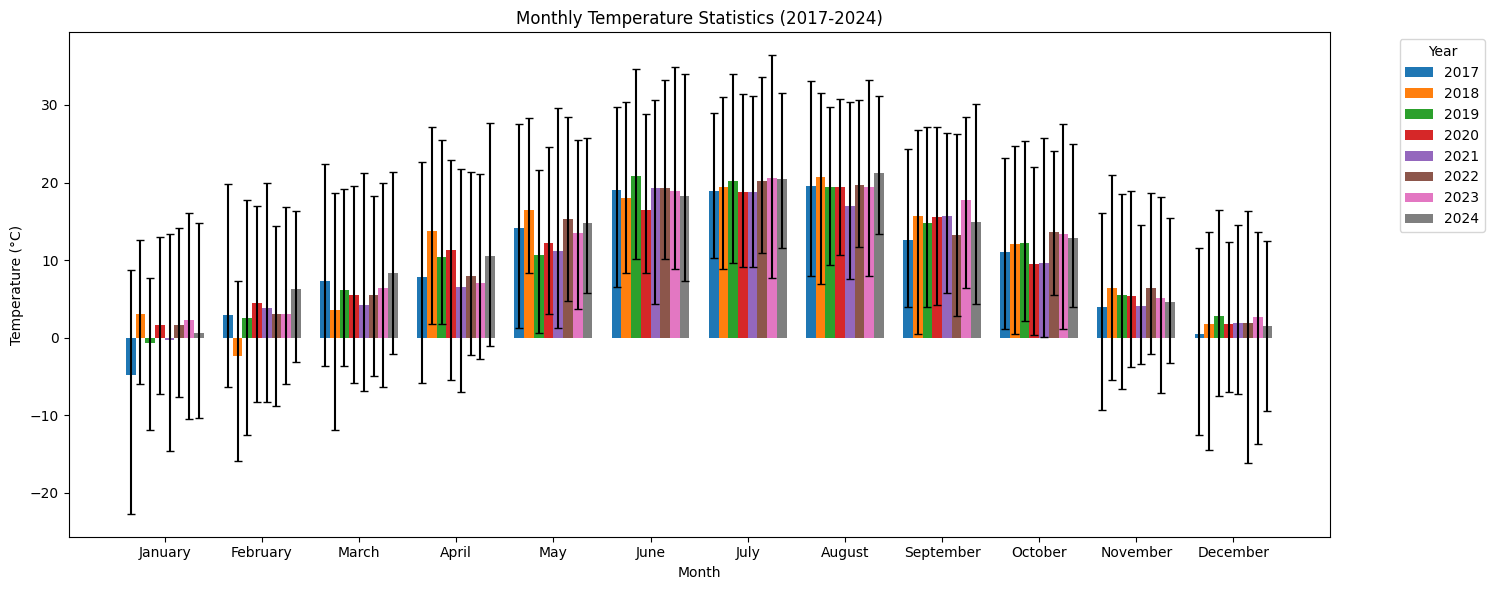

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

# Read the CSV file and ensure the 'time' column is parsed as datetime
df = pd.read_csv('./input.csv', parse_dates=['time'])

# Extract year and month columns
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

# Adjust for temperature column names
temp_mean_col = 'temperature_2m_mean (°C)'
temp_max_col = 'temperature_2m_max (°C)'
temp_min_col = 'temperature_2m_min (°C)'

# Group the data by year and month and compute mean, max, and min
grouped = df.groupby(['year', 'month']).agg(
    mean_temp=(temp_mean_col, 'mean'),
    max_temp=(temp_max_col, 'max'),
    min_temp=(temp_min_col, 'min')
).reset_index()

# Function to plot a subset of years
def plot_temperature_data(year_range, title):
    # Filter data for selected years
    subset = grouped[grouped['year'].between(year_range[0], year_range[1])]
    
    # Pivot for plotting
    pivot_mean = subset.pivot(index='month', columns='year', values='mean_temp')
    pivot_max = subset.pivot(index='month', columns='year', values='max_temp')
    pivot_min = subset.pivot(index='month', columns='year', values='min_temp')

    years = sorted(pivot_mean.columns)
    n_years = len(years)
    months = np.array(sorted(pivot_mean.index))

    x = np.arange(len(months))
    bar_width = 0.8 / n_years

    fig, ax = plt.subplots(figsize=(15, 6))

    for j, year in enumerate(years):
        x_positions = x - 0.4 + (j + 0.5) * bar_width
        y_values = pivot_mean.loc[months, year]
        lower_errors = y_values - pivot_min.loc[months, year]
        upper_errors = pivot_max.loc[months, year] - y_values
        yerr = [lower_errors, upper_errors]
        ax.bar(x_positions, y_values, width=bar_width, yerr=yerr, capsize=3, label=str(year))

    ax.set_xticks(x)
    ax.set_xticklabels([calendar.month_name[m] for m in months])
    ax.set_xlabel('Month')
    ax.set_ylabel('Temperature (°C)')
    ax.set_title(title)
    ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot first subset (2010–2016)
plot_temperature_data((2010, 2016), 'Monthly Temperature Statistics (2010-2016)')

# Plot second subset (2017–2024)
plot_temperature_data((2017, 2024), 'Monthly Temperature Statistics (2017-2024)')

## Monthly Mean Sunshine Duration (2010-2024)

This visualization shows the **mean daily sunshine duration** for each month from **2010 to 2024**. 

### **How to Read the Chart**:
- Each **group on the x-axis represents a month** (e.g., January, February, etc.).
- Each **bar within a group represents a different year** (2010–2024).
- The **y-axis represents the mean daily sunshine duration in seconds**.

### **Data Processing**:
- The dataset was grouped by **year and month**.
- The **mean sunshine duration** was computed for each month of each year.
- The data was plotted as a **grouped column chart** to visualize trends over the years.

### **Insights to Look For**:
- Do certain months show **higher average sunshine durations** than others?  
- Are there any **visible trends over the years**?  
- Are there months where sunshine duration **fluctuates significantly** from year to year?

This visualization helps in understanding **seasonal sunshine patterns** and possible **climate trends** over time.


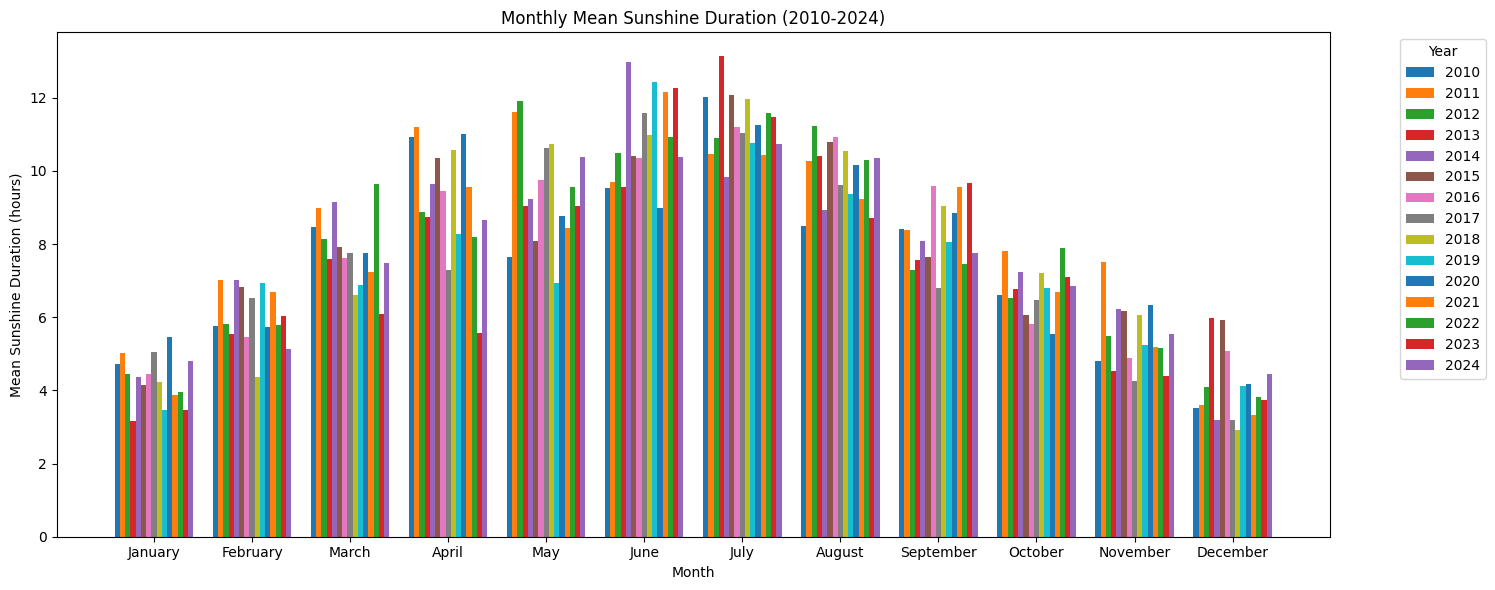

In [3]:
# Group data by year and month to calculate mean sunshine duration (converted to hours)
sunshine_col = "sunshine_duration (s)"
grouped_sunshine = df.groupby(['year', 'month'])[sunshine_col].mean().reset_index()
grouped_sunshine[sunshine_col] /= 3600  # Convert seconds to hours

# Function to plot grouped sunshine duration
def plot_sunshine_data(title):
    pivot_sunshine = grouped_sunshine.pivot(index='month', columns='year', values=sunshine_col)
    
    years = sorted(pivot_sunshine.columns)
    n_years = len(years)
    months = np.array(sorted(pivot_sunshine.index))

    x = np.arange(len(months))
    bar_width = 0.8 / n_years

    fig, ax = plt.subplots(figsize=(15, 6))

    for j, year in enumerate(years):
        x_positions = x - 0.4 + (j + 0.5) * bar_width
        y_values = pivot_sunshine.loc[months, year]
        ax.bar(x_positions, y_values, width=bar_width, label=str(year))

    ax.set_xticks(x)
    ax.set_xticklabels([calendar.month_name[m] for m in months])
    ax.set_xlabel("Month")
    ax.set_ylabel("Mean Sunshine Duration (hours)")
    ax.set_title(title)
    ax.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Plot sunshine duration for all available years
plot_sunshine_data("Monthly Mean Sunshine Duration (2010-2024)")

## Monthly Mean Precipitation Hours (2010-2024)

This visualization shows the **mean daily precipitation hours** for each month from **2010 to 2024**.

### **How to Read the Chart**:
- Each **group on the x-axis represents a month** (e.g., January, February, etc.).
- Each **bar within a group represents a different year** (2010–2024).
- The **y-axis represents the mean daily precipitation duration in hours**.

### **Data Processing**:
- The dataset was grouped by **year and month**.
- The **mean precipitation hours per day** were computed for each month of each year.
- The data was plotted as a **grouped column chart** to visualize trends over time.

### **Insights to Look For**:
- Which months tend to have **more precipitation hours on average**?  
- Are there **trends over time**, such as increasing or decreasing precipitation?  
- Do certain years show **higher or lower precipitation durations** than others?  

This visualization helps in understanding **seasonal precipitation patterns** and potential **climate trends** over the years. 🌧️📊

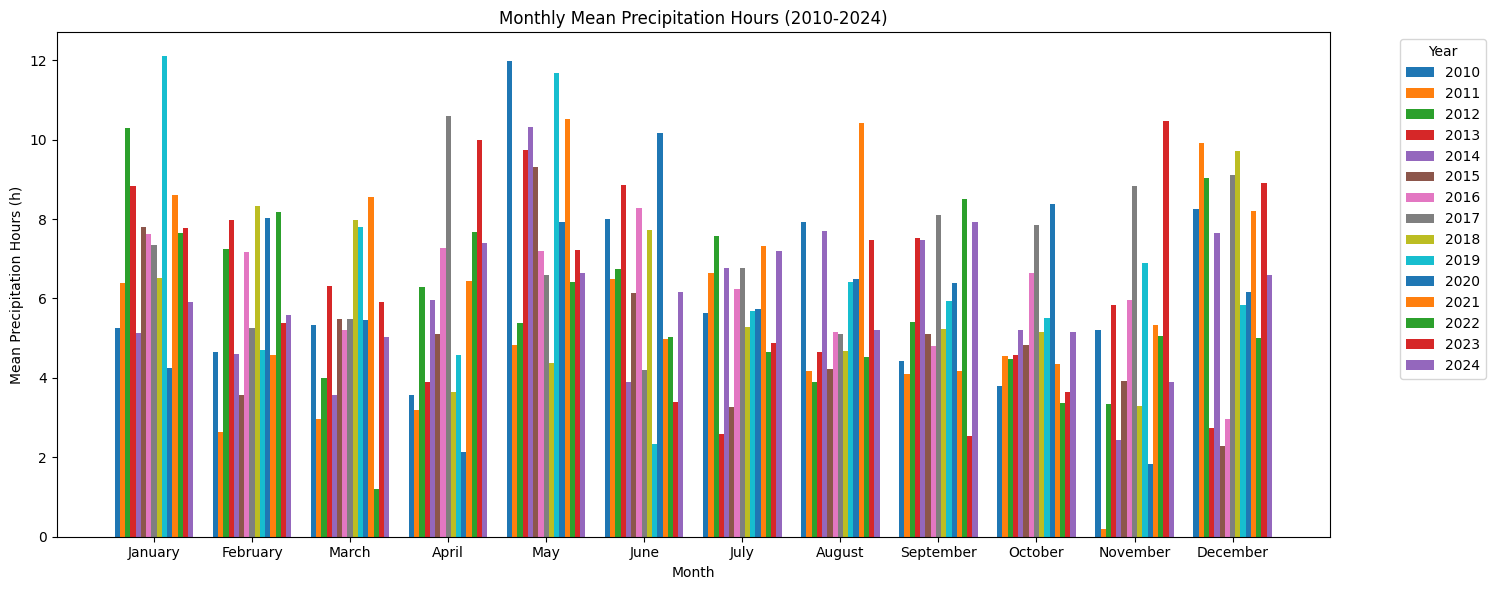

In [4]:
# Group data by year and month to calculate mean precipitation hours
precip_col = "precipitation_hours (h)"
grouped_precip = df.groupby(['year', 'month'])[precip_col].mean().reset_index()

# Function to plot grouped precipitation hours
def plot_precipitation_data(title):
    pivot_precip = grouped_precip.pivot(index='month', columns='year', values=precip_col)
    
    years = sorted(pivot_precip.columns)
    n_years = len(years)
    months = np.array(sorted(pivot_precip.index))

    x = np.arange(len(months))
    bar_width = 0.8 / n_years

    fig, ax = plt.subplots(figsize=(15, 6))

    for j, year in enumerate(years):
        x_positions = x - 0.4 + (j + 0.5) * bar_width
        y_values = pivot_precip.loc[months, year]
        ax.bar(x_positions, y_values, width=bar_width, label=str(year))

    ax.set_xticks(x)
    ax.set_xticklabels([calendar.month_name[m] for m in months])
    ax.set_xlabel("Month")
    ax.set_ylabel("Mean Precipitation Hours (h)")
    ax.set_title(title)
    ax.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Plot precipitation hours for all available years
plot_precipitation_data("Monthly Mean Precipitation Hours (2010-2024)")


## Monthly Total Rainfall (2010-2024)

This visualization shows the **total monthly rainfall** for each year from **2010 to 2024**.

### **How to Read the Chart**:
- Each **group on the x-axis represents a month** (e.g., January, February, etc.).
- Each **bar within a group represents a different year** (2010–2024).
- The **y-axis represents the total rainfall in millimeters (mm) per month**.

### **Data Processing**:
- The dataset was grouped by **year and month**.
- The **total rain sum per month** was computed.
- The data was plotted as a **grouped column chart** to visualize trends over time.

### **Insights to Look For**:
- Which months tend to have **higher total rainfall**?  
- Are there **significant variations in rainfall between years**?  
- Do certain years show **higher or lower rainfall totals** compared to others?  

This visualization helps in understanding **monthly rainfall distribution** and detecting possible **climate trends over the years**. ☔📊


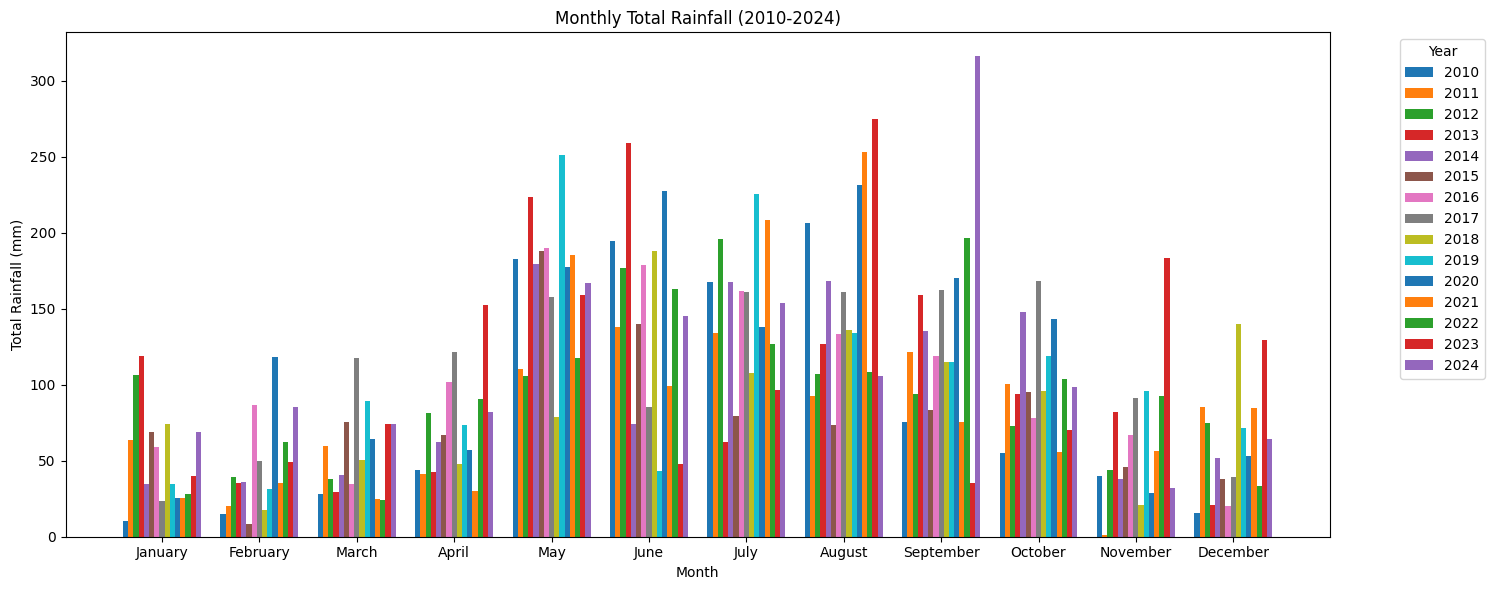

In [5]:
# Group data by year and month to calculate total rain sum
rain_col = "rain_sum (mm)"
grouped_rain = df.groupby(['year', 'month'])[rain_col].sum().reset_index()

# Function to plot grouped rain sum
def plot_rain_data(title):
    pivot_rain = grouped_rain.pivot(index='month', columns='year', values=rain_col)

    years = sorted(pivot_rain.columns)
    n_years = len(years)
    months = np.array(sorted(pivot_rain.index))

    x = np.arange(len(months))
    bar_width = 0.8 / n_years

    fig, ax = plt.subplots(figsize=(15, 6))

    for j, year in enumerate(years):
        x_positions = x - 0.4 + (j + 0.5) * bar_width
        y_values = pivot_rain.loc[months, year]
        ax.bar(x_positions, y_values, width=bar_width, label=str(year))

    ax.set_xticks(x)
    ax.set_xticklabels([calendar.month_name[m] for m in months])
    ax.set_xlabel("Month")
    ax.set_ylabel("Total Rainfall (mm)")
    ax.set_title(title)
    ax.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Plot total rain sum for all available years
plot_rain_data("Monthly Total Rainfall (2010-2024)")


## Monthly Total Snowfall (2010-2024)

This visualization shows the **total monthly snowfall** for each year from **2010 to 2024**.

### **How to Read the Chart**:
- Each **group on the x-axis represents a month** (e.g., January, February, etc.).
- Each **bar within a group represents a different year** (2010–2024).
- The **y-axis represents the total snowfall in centimeters (cm) per month**.

### **Data Processing**:
- The dataset was grouped by **year and month**.
- The **total snowfall sum per month** was computed.
- The data was plotted as a **grouped column chart** to visualize trends over time.

### **Insights to Look For**:
- Which months tend to have **higher total snowfall**?  
- Are there **significant variations in snowfall between years**?  
- Do certain years show **higher or lower snowfall totals** compared to others?  

This visualization helps in understanding **monthly snowfall distribution** and detecting possible **climate trends over the years**. ❄️📊


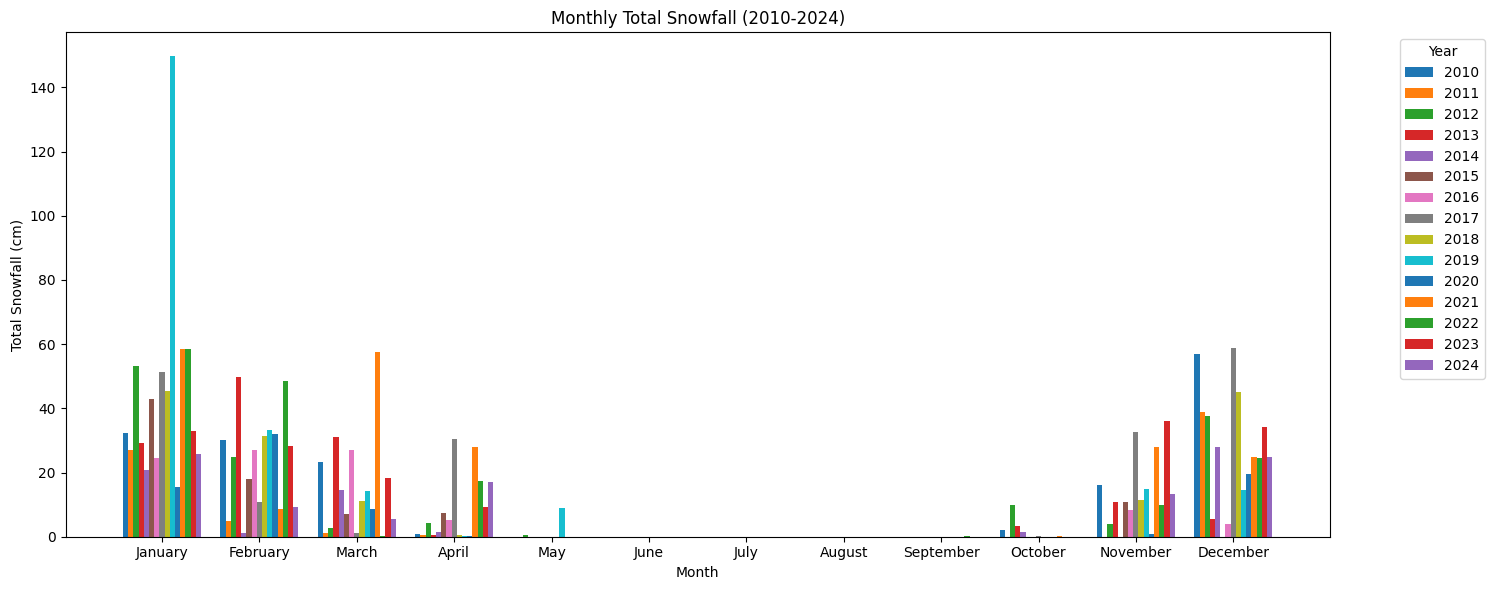

In [6]:
# Group data by year and month to calculate total snowfall sum
snow_col = "snowfall_sum (cm)"
grouped_snow = df.groupby(['year', 'month'])[snow_col].sum().reset_index()

# Function to plot grouped snowfall sum
def plot_snow_data(title):
    pivot_snow = grouped_snow.pivot(index='month', columns='year', values=snow_col)

    years = sorted(pivot_snow.columns)
    n_years = len(years)
    months = np.array(sorted(pivot_snow.index))

    x = np.arange(len(months))
    bar_width = 0.8 / n_years

    fig, ax = plt.subplots(figsize=(15, 6))

    for j, year in enumerate(years):
        x_positions = x - 0.4 + (j + 0.5) * bar_width
        y_values = pivot_snow.loc[months, year]
        ax.bar(x_positions, y_values, width=bar_width, label=str(year))

    ax.set_xticks(x)
    ax.set_xticklabels([calendar.month_name[m] for m in months])
    ax.set_xlabel("Month")
    ax.set_ylabel("Total Snowfall (cm)")
    ax.set_title(title)
    ax.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Plot total snowfall sum for all available years
plot_snow_data("Monthly Total Snowfall (2010-2024)")


## Monthly Maximum Wind Speed at 10m (2010-2024)

This visualization shows the **maximum monthly wind speed at 10m** for each year from **2010 to 2024**.

### **How to Read the Chart**:
- Each **group on the x-axis represents a month** (e.g., January, February, etc.).
- Each **bar within a group represents a different year** (2010–2024).
- The **y-axis represents the maximum wind speed in kilometers per hour (km/h)**.

### **Data Processing**:
- The dataset was grouped by **year and month**.
- The **maximum wind speed at 10m per month** was computed.
- The data was plotted as a **grouped column chart** to visualize trends over time.

### **Insights to Look For**:
- Which months tend to have **higher maximum wind speeds**?  
- Are there **significant fluctuations in wind speed** between years?  
- Do certain years show **higher or lower wind speeds** compared to others?  

This visualization helps in understanding **wind speed patterns** and can be useful for detecting **weather anomalies or trends**. 💨📊


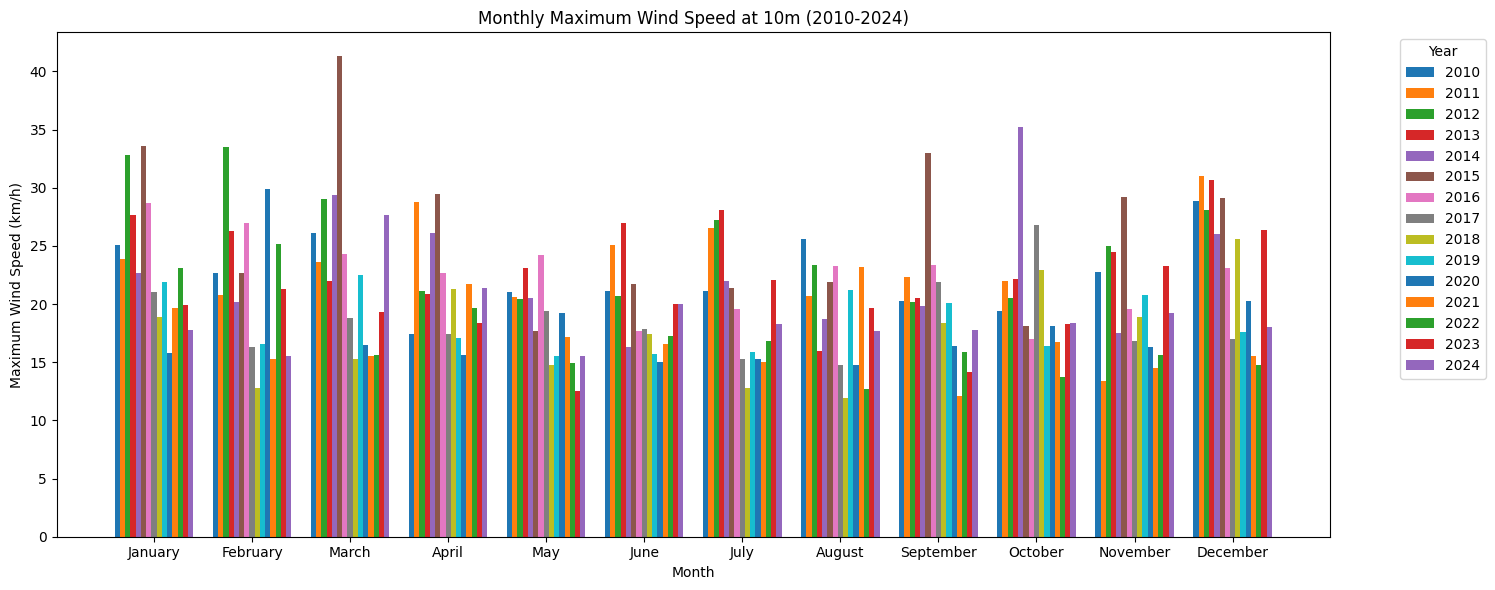

In [7]:
# Group data by year and month to calculate maximum wind speed at 10m
wind_speed_col = "wind_speed_10m_max (km/h)"
grouped_wind_speed = df.groupby(['year', 'month'])[wind_speed_col].max().reset_index()

# Function to plot grouped wind speed at 10m
def plot_wind_speed_data(title):
    pivot_wind_speed = grouped_wind_speed.pivot(index='month', columns='year', values=wind_speed_col)

    years = sorted(pivot_wind_speed.columns)
    n_years = len(years)
    months = np.array(sorted(pivot_wind_speed.index))

    x = np.arange(len(months))
    bar_width = 0.8 / n_years

    fig, ax = plt.subplots(figsize=(15, 6))

    for j, year in enumerate(years):
        x_positions = x - 0.4 + (j + 0.5) * bar_width
        y_values = pivot_wind_speed.loc[months, year]
        ax.bar(x_positions, y_values, width=bar_width, label=str(year))

    ax.set_xticks(x)
    ax.set_xticklabels([calendar.month_name[m] for m in months])
    ax.set_xlabel("Month")
    ax.set_ylabel("Maximum Wind Speed (km/h)")
    ax.set_title(title)
    ax.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Plot maximum wind speed at 10m for all available years
plot_wind_speed_data("Monthly Maximum Wind Speed at 10m (2010-2024)")


## Monthly Average Maximum Wind Speed at 10m (2010-2024)

This visualization shows the **average maximummonthly wind speed at 10m** for each year from **2010 to 2024**.

### **How to Read the Chart**:
- Each **group on the x-axis represents a month** (e.g., January, February, etc.).
- Each **bar within a group represents a different year** (2010–2024).
- The **y-axis represents the average wind speed in kilometers per hour (km/h)**.

### **Data Processing**:
- The dataset was grouped by **year and month**.
- The **average maximum wind speed at 10m per month** was computed.
- The data was plotted as a **grouped column chart** to visualize trends over time.

### **Insights to Look For**:
- Which months tend to have **higher average wind speeds**?  
- Are there **any years with significantly lower or higher average wind speeds** compared to others?  
- Do certain months have **consistent patterns of higher or lower wind speeds**?  

This visualization provides insights into the **average wind speed patterns** throughout the years and can help identify **seasonal variations**. 💨📊


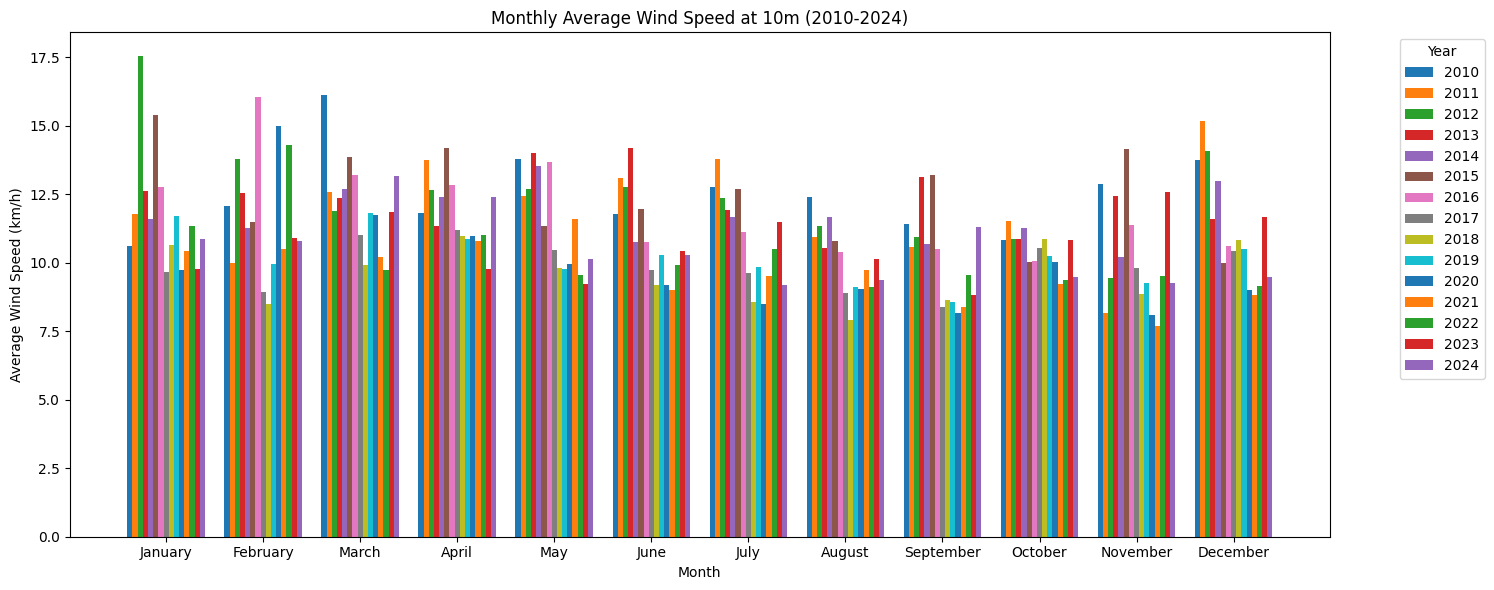

In [ ]:
# Group data by year and month to calculate average wind speed at 10m
grouped_avg_wind_speed = df.groupby(['year', 'month'])[wind_speed_col].mean().reset_index()

# Function to plot grouped average wind speed at 10m
def plot_avg_wind_speed_data(title):
    pivot_avg_wind_speed = grouped_avg_wind_speed.pivot(index='month', columns='year', values=wind_speed_col)

    years = sorted(pivot_avg_wind_speed.columns)
    n_years = len(years)
    months = np.array(sorted(pivot_avg_wind_speed.index))

    x = np.arange(len(months))
    bar_width = 0.8 / n_years

    fig, ax = plt.subplots(figsize=(15, 6))

    for j, year in enumerate(years):
        x_positions = x - 0.4 + (j + 0.5) * bar_width
        y_values = pivot_avg_wind_speed.loc[months, year]
        ax.bar(x_positions, y_values, width=bar_width, label=str(year))

    ax.set_xticks(x)
    ax.set_xticklabels([calendar.month_name[m] for m in months])
    ax.set_xlabel("Month")
    ax.set_ylabel("Average Wind Speed (km/h)")
    ax.set_title(title)
    ax.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Plot average wind speed at 10m for all available years
plot_avg_wind_speed_data("Monthly Average Maximum Wind Speed at 10m (2010-2024)")
